<a href="https://colab.research.google.com/github/selimunal/tensorflow/blob/main/SimpleRNN_Sine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.9.2


In [ ]:
from tensorflow.keras.layers import Input,SimpleRNN, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


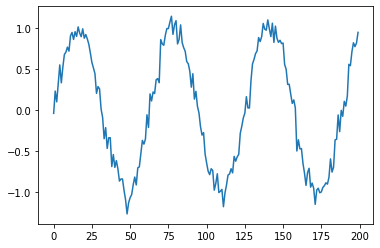

In [ ]:
#making original data
series=np.sin(0.1*np.arange(200)) +np.random.randn(200)*0.1
#plot
plt.plot(series)
plt.show()

In [ ]:
#building the dataset
T=10
D=1
X=[]
Y=[]
for t in range(len(series)-T):
  x=series[t:t+T]
  X.append(x)
  y=series[t+T]
  Y.append(y)

In [ ]:
X=np.array(X).reshape(-1,T,1) # Data NxTxD
Y=np.array(Y)
N=len(X)

In [ ]:
X.shape,Y.shape

((190, 10, 1), (190,))

In [ ]:
  # Building RNN model
  i=Input(shape=(T,1))
  x=SimpleRNN(5,activation="relu")(i)
  x=Dense(1)(x)
  model=Model(i,x)
  model.compile(
      loss="mse",
      optimizer=Adam(lr=0.1)
  )

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
#train the RNN
r=model.fit(
    X[:-N//2],Y[:-N//2],
    epochs=80,
    validation_data=(X[-N//2:],Y[-N//2:])
)

Epoch 1/80
3/3 [==============================] - 1s 122ms/step - loss: 0.5816 - val_loss: 0.2270
Epoch 2/80
3/3 [==============================] - 0s 17ms/step - loss: 0.2528 - val_loss: 0.1109
Epoch 3/80
3/3 [==============================] - 0s 21ms/step - loss: 0.1326 - val_loss: 0.0693
Epoch 4/80
3/3 [==============================] - 0s 31ms/step - loss: 0.0833 - val_loss: 0.0596
Epoch 5/80
3/3 [==============================] - 0s 23ms/step - loss: 0.0482 - val_loss: 0.0300
Epoch 6/80
3/3 [==============================] - 0s 17ms/step - loss: 0.0358 - val_loss: 0.0235
Epoch 7/80
3/3 [==============================] - 0s 24ms/step - loss: 0.0239 - val_loss: 0.0299
Epoch 8/80
3/3 [==============================] - 0s 18ms/step - loss: 0.0272 - val_loss: 0.0281
Epoch 9/80
3/3 [==============================] - 0s 24ms/step - loss: 0.0257 - val_loss: 0.0256
Epoch 10/80
3/3 [==============================] - 0s 20ms/step - loss: 0.0255 - val_loss: 0.0244
Epoch 11/80
3/3 [===========

In [ ]:
  # Building RNN model
  i=Input(shape=(T,1))
  x=SimpleRNN(5,activation="tanh")(i)
  x=Dense(1)(x)
  model=Model(i,x)
  model.compile(
      loss="mse",
      optimizer=Adam(lr=0.1)
  )

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
  # Building RNN model
  i=Input(shape=(T,1))
  x=SimpleRNN(5,activation=None)(i)
  x=Dense(1)(x)
  model=Model(i,x)
  model.compile(
      loss="mse",
      optimizer=Adam(lr=0.1)
  )

In [ ]:
#train the RNN
r=model.fit(
    X[:-N//2],Y[:-N//2], #train set before the future data points
    epochs=80,
    validation_data=(X[-N//2:],Y[-N//2:]) #future data points
)

Epoch 1/80
3/3 [==============================] - 1s 128ms/step - loss: 0.4250 - val_loss: 0.2346
Epoch 2/80
3/3 [==============================] - 0s 18ms/step - loss: 0.1674 - val_loss: 0.2572
Epoch 3/80
3/3 [==============================] - 0s 18ms/step - loss: 0.1478 - val_loss: 0.0492
Epoch 4/80
3/3 [==============================] - 0s 20ms/step - loss: 0.0652 - val_loss: 0.0447
Epoch 5/80
3/3 [==============================] - 0s 24ms/step - loss: 0.0425 - val_loss: 0.0365
Epoch 6/80
3/3 [==============================] - 0s 20ms/step - loss: 0.0308 - val_loss: 0.0315
Epoch 7/80
3/3 [==============================] - 0s 18ms/step - loss: 0.0269 - val_loss: 0.0270
Epoch 8/80
3/3 [==============================] - 0s 17ms/step - loss: 0.0214 - val_loss: 0.0286
Epoch 9/80
3/3 [==============================] - 0s 18ms/step - loss: 0.0239 - val_loss: 0.0277
Epoch 10/80
3/3 [==============================] - 0s 18ms/step - loss: 0.0203 - val_loss: 0.0265
Epoch 11/80
3/3 [===========

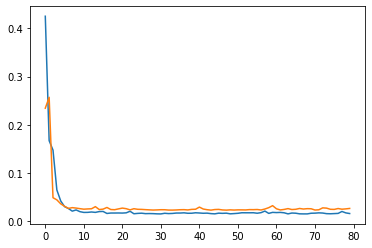

In [ ]:
plt.plot(r.history["loss"])
plt.plot(r.history["val_loss"])

In [ ]:
  #1 STEP FORCAST
  #wrong forcast using true targets
  validation_target=Y[-N//2:]
  validation_predictions=[]
  i=N//2

In [ ]:
while len(validation_predictions)<len(validation_target):
  p=model.predict(X[i].reshape(1,-1,1))[0,0] #1x1 array
  i +=1

  validation_predictions.append(p)

1/1 [==============================] - 0s 22ms/step


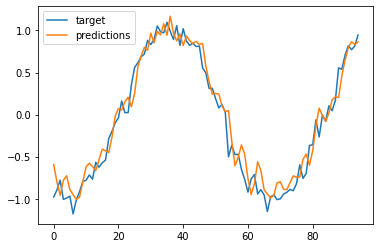

In [ ]:
plt.plot(validation_target,label="target")
plt.plot(validation_predictions,label="predictions")
plt.legend() 
#THIS IS MISLEADING

In [ ]:
#REAL FORCAST
validation_target=Y[-N//2:]
validation_predictions=[]

#train input
last_x=X[-N//2]# 1D array of length T

In [ ]:
#@title
while len(validation_predictions)<len(validation_target):
  p=model.predict(last_x.reshape(1,-1,1))[0,0]

  validation_predictions.append(p)

  last_x=np.roll(last_x,-1)
  last_x[-1]=p

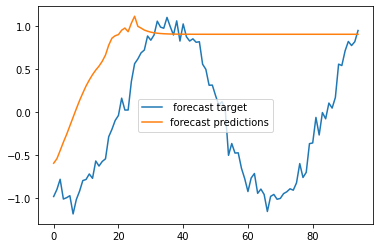

In [ ]:
plt.plot(validation_target,label=" forecast target")
plt.plot(validation_predictions,label="forecast predictions")
plt.legend()
#with linear paramerets does not perform as well as linear regression
#autoregression does this perfectly
#RNN has too much flexibility, constrained parameters can be shared so makes it 
#CNN better, AR2 model works best perfectly fits

In [ ]:
#USING NONE ACTIVATION FUNCTION WORKS GOOD
#WHY?
#NN WITH NO ACTIVATION FUNCTION REDUCES TO LINEAR MODEL
#LINEAR MODEL IS GOOD FOR THIS

In [ ]:
#USE NOISE AS WELL, lINEAR MODEL IS NOT GOOD WITH NOISE
# TANH IS NOT GOOD AS WELL
#RELU USE: STILL NOT GOOD REPEATING SAME VALUE NOT GOOD MODEL
